In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import pydotplus
from sklearn import tree

In [ ]:
dataset = pd.read_excel('sample_data/dataset.xlsx', usecols=['CPA', 'DISTANCE', 'SPEED', 'PREDIKSI'])

In [ ]:
dataset.head()

,SPEED,DISTANCE,CPA,PREDIKSI
0,8,4,0,YES
1,8,8,0,YES
2,12,8,3,NO
3,5,3,0,NO
4,3,8,7,NO


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SPEED     100 non-null    int64 
 1   DISTANCE  100 non-null    int64 
 2   CPA       100 non-null    int64 
 3   PREDIKSI  100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
dataset.describe()

,SPEED,DISTANCE,CPA
count,100.00000,100.000000,100.000000
mean,7.89000,6.470000,4.790000
std,3.43745,3.179654,2.671567
min,1.00000,1.000000,0.000000
25%,5.00000,4.000000,3.000000
50%,8.00000,6.500000,5.000000
75%,10.25000,8.250000,7.000000
max,16.00000,13.000000,12.000000


In [ ]:
dataset.isnull().sum()

SPEED       0
DISTANCE    0
CPA         0
PREDIKSI    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


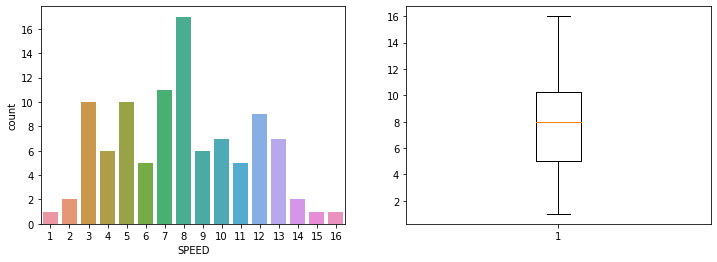

In [ ]:
#Univariate analysis SPEED.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['SPEED'])
f.add_subplot(1,2,2)
plt.boxplot(dataset['SPEED'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


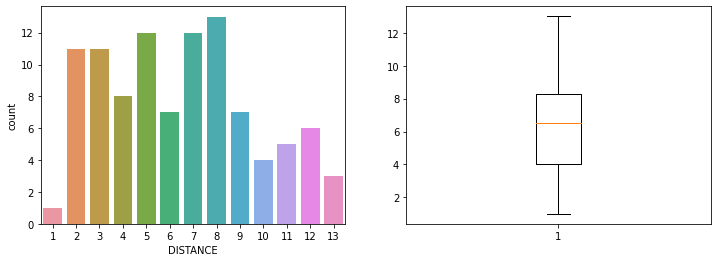

In [ ]:
#Univariate analysis DISTANCE.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['DISTANCE'])
f.add_subplot(1,2,2)
plt.boxplot(dataset['DISTANCE'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


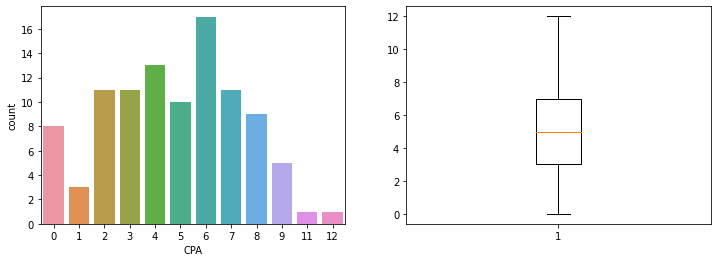

In [ ]:
#Univariate analysis CPA.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(dataset['CPA'])
f.add_subplot(1,2,2)
plt.boxplot(dataset['CPA'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

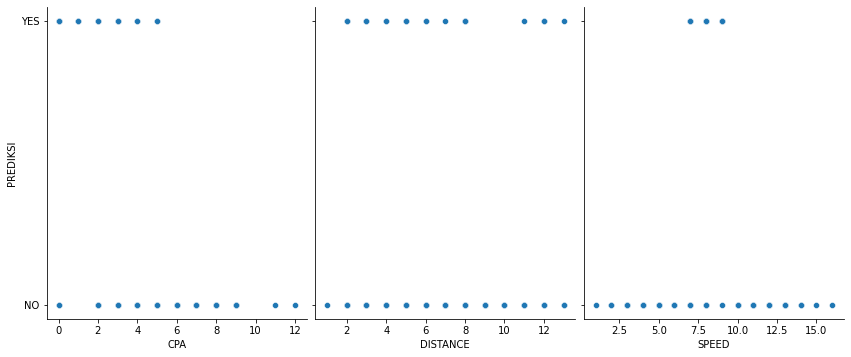

In [ ]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=dataset, x_vars=['CPA', 'DISTANCE', 'SPEED'], y_vars=['PREDIKSI'], size=5, aspect=0.80)

In [ ]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
dataset.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,SPEED,DISTANCE,CPA
SPEED,1.00,0.02,0.06
DISTANCE,0.02,1.00,-0.05
CPA,0.06,-0.05,1.00


In [ ]:
#Pertama, buat variabel x dan y.
x = dataset[['SPEED','DISTANCE','CPA']]
y = dataset['PREDIKSI']

#Kedua, ucup split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Ketiga, ucup bikin object linear regresi.
decision_tree = DecisionTreeClassifier()

#Keempat, train the model menggunakan training data yang sudah displit.
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

In [ ]:
# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(x_train, y_train))
print('Testing Accuracy :', decision_tree.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)


Confusion matrix
[[13  2]
 [ 0  5]]

Classification report
              precision    recall  f1-score   support

          NO       1.00      0.87      0.93        15
         YES       0.71      1.00      0.83         5

    accuracy                           0.90        20
   macro avg       0.86      0.93      0.88        20
weighted avg       0.93      0.90      0.90        20



Text(0.5, 1.0, 'Actual vs Predicted value : Decision Tree')

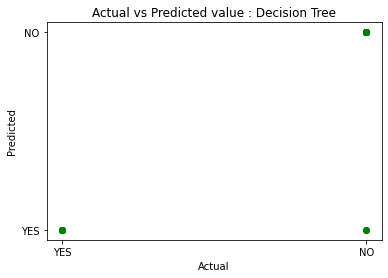

In [ ]:
import matplotlib.pyplot as plt 
#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred,c = 'green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted value : Decision Tree')
#plt.show()

In [ ]:
decision_tree.predict([[8,3,4]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['YES'], dtype=object)